In [1]:
import glob
import os 
import densmap as dm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
workdir = "WorkdirRoughMeniscus/"
Lx = 82.80000
Lx_upp = 1.5*Lx
Lx_low = 0.5*Lx
dt = 12.5 # ps

In [3]:
a_range = [0.2,0.4,0.6,0.8,1.0]
n_range = [6,8,10,12,14,16]
ca_range = [0.050,0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250]

In [4]:
def analyze_displacement(npz_archive) :
    
    t = npz_archive['arr_0']
    x = npz_archive['arr_1']

    # Select only last part
    t_end = t[-(window_i+clip_i):-clip_i]
    x_end = x[-(window_i+clip_i):-clip_i]

    # Clean outliers
    """
    i_out = []
    for i in range(len(x_end)) :
        if x_end[i]>Lx_upp :
            i_out.append(i)
        elif x_end[i]<Lx_low :
            i_out.append(i)
    t_end = np.delete(t_end,i_out)
    x_end = np.delete(x_end,i_out)
    """
    
    p_fit, res, _, _, _ = np.polyfit(t_end,x_end,deg=1,full=True)
    s2_res = np.sum(res)
    s2_tot = np.sum((x_end-np.mean(x_end))**2)
    R2 = 1-s2_res/s2_tot
    return p_fit[0], R2

4.476177771136051


Text(0, 0.5, 'x')

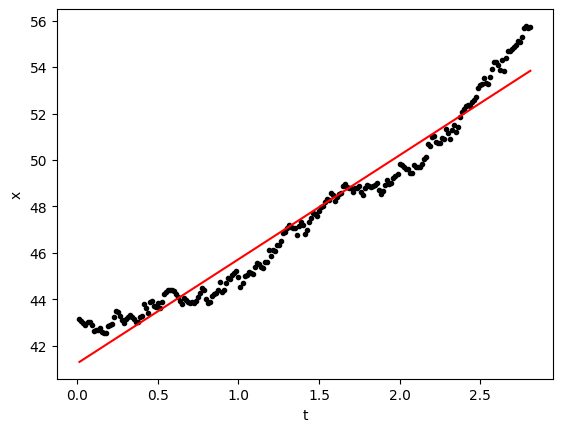

In [5]:
### INITAL TEST ###

window_t = 4 # ns
clip_t = 0.5 # ns
window_i = int((1e3)*window_t/dt)
clip_i = int((1e3)*window_t/dt)
a = 1.0
n = 16
ca = 0.250
a_tag = str(a).replace('.','').ljust(2,'0')
n_tag = str(n).rjust(2,'0')
c_tag = str(10*ca).replace('.','').ljust(3,'0')
file_tag = 'N'+n_tag+'A'+a_tag+'C'+c_tag
test_load = np.load(workdir+file_tag+'.npz')
t = test_load['arr_0']
x = test_load['arr_1']
# Select only last part
t_end = t[-(window_i+clip_i):-clip_i]
x_end = x[-(window_i+clip_i):-clip_i]
"""
i_out = []
for i in range(len(x_end)) :
    if x_end[i]>Lx_upp :
        i_out.append(i)
    elif x_end[i]<Lx_low :
        i_out.append(i)
t_end = np.delete(t_end,i_out)
x_end = np.delete(x_end,i_out)
"""
p_fit = np.polyfit(t_end,x_end,deg=1)
print(p_fit[0])

%matplotlib inline
plt.plot(t_end, x_end,'k.')
plt.plot(t_end, np.polyval(p_fit,t_end),'r-')
plt.xlabel("t")
plt.ylabel("x")

### --- Actual workflow ---

In [6]:
window_t = 4 # ns
clip_t = 0.5 # ns
window_i = int((1e3)*window_t/dt)
clip_i = int((1e3)*window_t/dt)

In [7]:
p_hist = []
R2_hist = []
sim_param = []

for a in a_range :
    for n in n_range :
        for ca in ca_range :
            a_tag = str(a).replace('.','').ljust(2,'0')
            n_tag = str(n).rjust(2,'0')
            c_tag = str(10*ca).replace('.','').ljust(3,'0')
            file_tag = 'N'+n_tag+'A'+a_tag+'C'+c_tag
            try:
                try_load = np.load(workdir+file_tag+'.npz')
                print ('#   '+file_tag+' Archive found!     #')
                p, R2 = analyze_displacement(try_load)
                sim_param.append((a,n,ca))
                # p_hist.append(p/ca)
                # p_hist.append(p*ca)
                p_hist.append(p)
                R2_hist.append(R2)
            except FileNotFoundError as e:
                print ('!!! '+file_tag+' No archived data !!!')

#   N06A02C050 Archive found!     #
!!! N06A02C075 No archived data !!!
#   N06A02C100 Archive found!     #
!!! N06A02C125 No archived data !!!
#   N06A02C150 Archive found!     #
!!! N06A02C175 No archived data !!!
#   N06A02C200 Archive found!     #
!!! N06A02C225 No archived data !!!
#   N06A02C250 Archive found!     #
#   N08A02C050 Archive found!     #
#   N08A02C075 Archive found!     #
#   N08A02C100 Archive found!     #
#   N08A02C125 Archive found!     #
#   N08A02C150 Archive found!     #
#   N08A02C175 Archive found!     #
#   N08A02C200 Archive found!     #
#   N08A02C225 Archive found!     #
#   N08A02C250 Archive found!     #
!!! N10A02C050 No archived data !!!
!!! N10A02C075 No archived data !!!
!!! N10A02C100 No archived data !!!
!!! N10A02C125 No archived data !!!
!!! N10A02C150 No archived data !!!
!!! N10A02C175 No archived data !!!
!!! N10A02C200 No archived data !!!
!!! N10A02C225 No archived data !!!
!!! N10A02C250 No archived data !!!
#   N12A02C050 Archive found

In [8]:
p_hist = np.array(p_hist)
# p_hist = np.log(np.abs(p_hist))
# p_hist = np.abs(p_hist)
R2_hist = np.array(R2_hist)
sim_param = np.array(sim_param)

### --- Finding a separation criterion ---

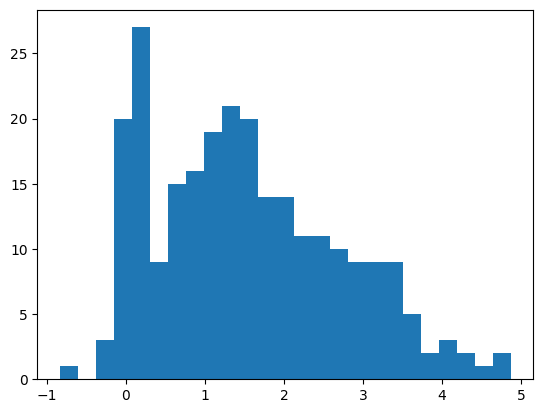

In [9]:
%matplotlib inline
plt.hist(p_hist,bins=25)
plt.show()

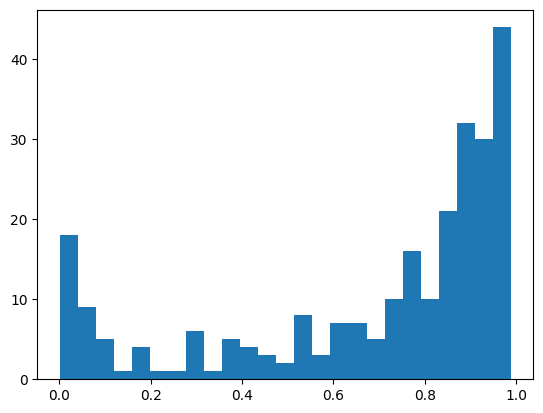

In [10]:
%matplotlib inline
plt.hist(R2_hist,bins=25)
plt.show()

<IPython.core.display.Javascript object>


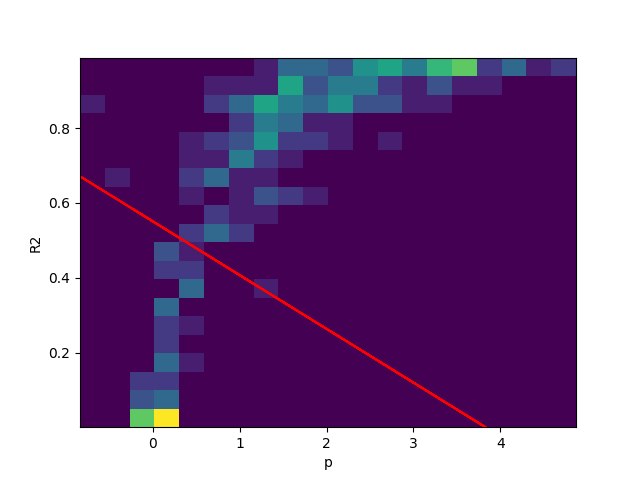

In [16]:
%matplotlib notebook

ah = (0.36-0.61)/(1.33+0.41)
bh = 0.36-1.33*ah

plt.hist2d(p_hist,R2_hist,bins=20)
plt.plot(p_hist,ah*p_hist+bh,'r-')
# plt.plot(p_hist,)
plt.xlabel("p")
plt.ylabel("R2")
plt.show()

### -- Plotting for a given parameter --- 

In [22]:
### Given 'a' ###
a_ref = 1.0
idx_ref = np.where(sim_param[:,0]==a_ref)
n_ref = sim_param[idx_ref,1][0]
c_ref = sim_param[idx_ref,2][0]

In [23]:
### Given 'n' ###
"""
n_ref = 16
idx_ref = np.where(sim_param[:,1]==n_ref)
a_ref = sim_param[idx_ref,0][0]
c_ref = sim_param[idx_ref,2][0]
"""

'\nn_ref = 16\nidx_ref = np.where(sim_param[:,1]==n_ref)\na_ref = sim_param[idx_ref,0][0]\nc_ref = sim_param[idx_ref,2][0]\n'

In [24]:
p_ref = p_hist[idx_ref]
r_ref = R2_hist[idx_ref]
idx_sup = []
idx_sub = []
# ah, bh
for i in range(len(p_ref)) :
    if r_ref[i]>(ah*p_ref[i]+bh) :
        idx_sup.append(i)
    else :
        idx_sub.append(i)

<IPython.core.display.Javascript object>


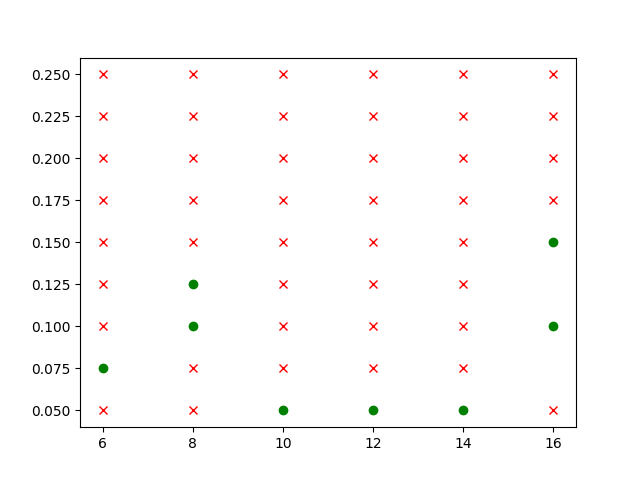

In [25]:
### Given 'a' ###
%matplotlib notebook
plt.plot(n_ref[idx_sup],c_ref[idx_sup],'rx')
plt.plot(n_ref[idx_sub],c_ref[idx_sub],'go')

<IPython.core.display.Javascript object>


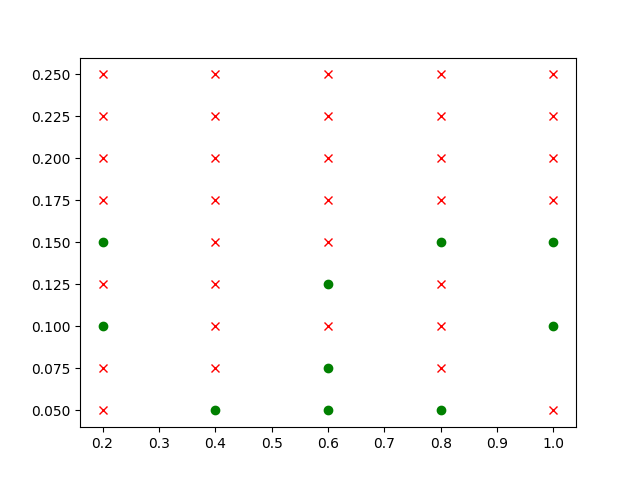

In [21]:
### Given 'n' ###
"""
%matplotlib notebook
plt.plot(a_ref[idx_sup],c_ref[idx_sup],'rx')
plt.plot(a_ref[idx_sub],c_ref[idx_sub],'go')
"""